# Hierarchical clustering
- 계층 군집화
- https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [1]:
import mglearn

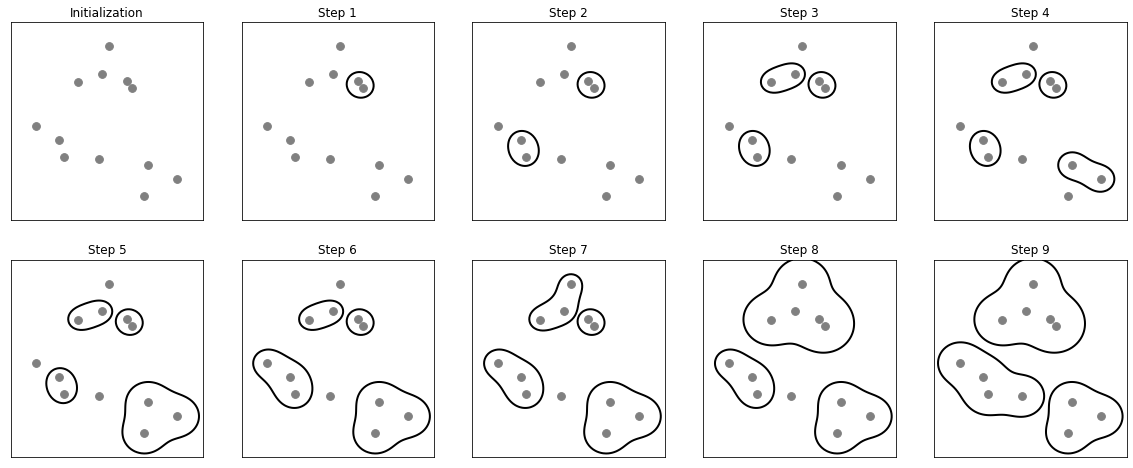

In [2]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

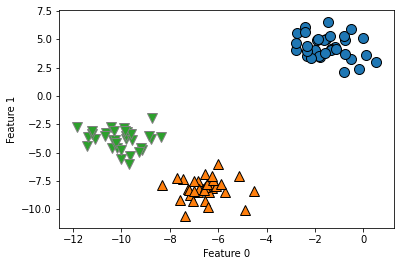

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

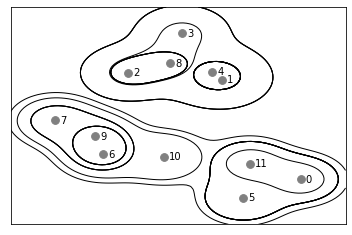

In [9]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'Cluster distance')

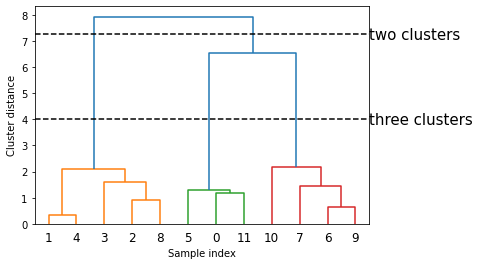

In [14]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)

dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', color='k')
ax.plot(bounds, [4, 4], '--', color='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

In [15]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memberships:\n{}'.format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [16]:
dbscan = DBSCAN(eps=1.0, min_samples=2)
clusters = dbscan.fit_predict(X)
print('Cluster memberships:\n{}'.format(clusters))

Cluster memberships:
[-1  0  0 -1  0 -1  1  1  0  1 -1 -1]


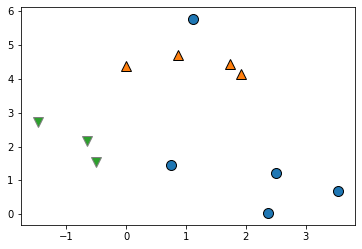

In [18]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], clusters)

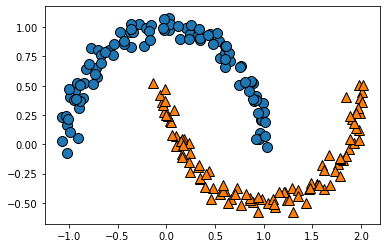

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0, 0.5, 'Feature 1')

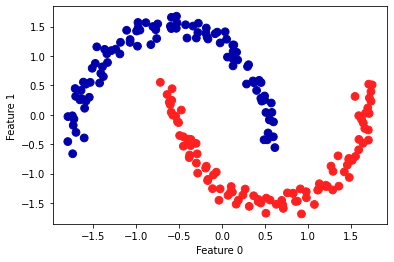

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

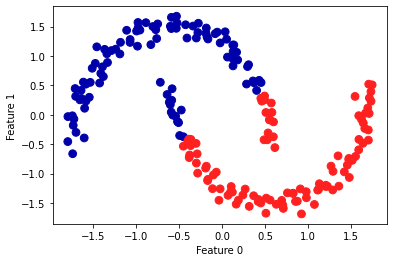

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)
y_pred = kmeans.predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [36]:
import numpy as np
from sklearn.metrics.cluster import adjusted_rand_score

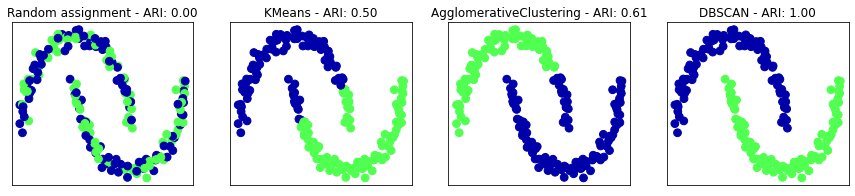

In [39]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
    
    

In [40]:
from sklearn.metrics import accuracy_score
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

print('Accuracy score: {:.2f}'.format(accuracy_score(cluster1, cluster2)))
print('ARI: {:.2f}'.format(adjusted_rand_score(cluster1, cluster2)))

Accuracy score: 0.00
ARI: 1.00


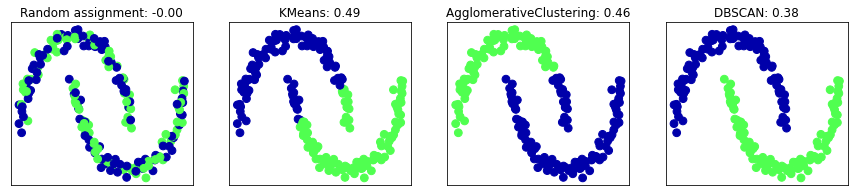

In [45]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks': (), 'yticks': ()})
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment: {:.2f}'.format(silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title('{}: {:.2f}'.format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [52]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
X_people = X_people/255.
y_people = people.target[mask]

pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [53]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [54]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1]


In [55]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('Unique labels: {}'.format(np.unique(labels)))

Unique labels: [-1  0]


In [56]:
print('Number of points per cluster: {}'.format(np.bincount(labels+1)))

Number of points per cluster: [  32 2031]


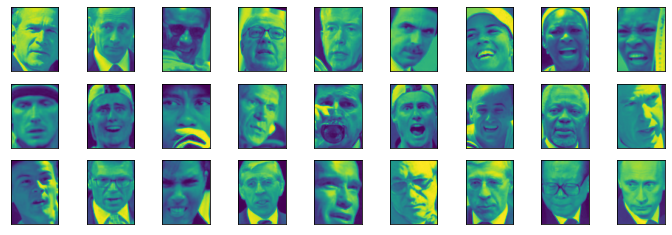

In [58]:
noise = X_people[labels == -1]
fig, axes = plt.subplots(3, 9, figsize=(12,4), subplot_kw={'xticks': (), 'yticks': ()})
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [59]:
for eps in [1,3,5,7,9,11,13]:
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('Clusters present: {}'.format(np.unique(labels)))
    print('Clusters size: {}'.format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Clusters size: [2063]

eps=3
Clusters present: [-1]
Clusters size: [2063]

eps=5
Clusters present: [-1]
Clusters size: [2063]

eps=7
Clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
Clusters size: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Clusters present: [-1  0  1  2]
Clusters size: [1307  750    3    3]

eps=11
Clusters present: [-1  0]
Clusters size: [ 413 1650]

eps=13
Clusters present: [-1  0]
Clusters size: [ 120 1943]


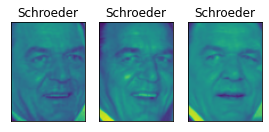

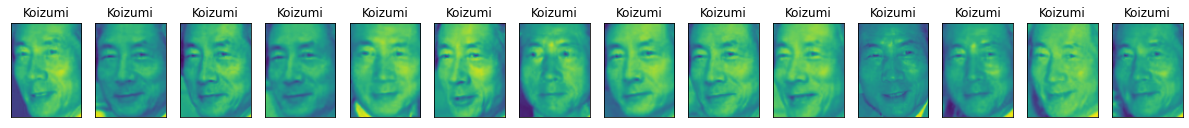

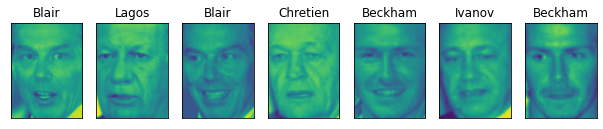

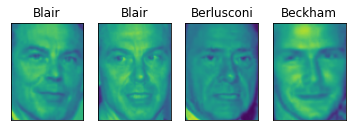

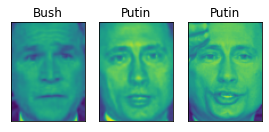

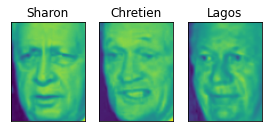

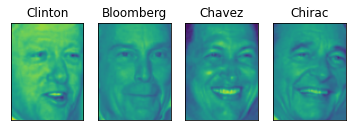

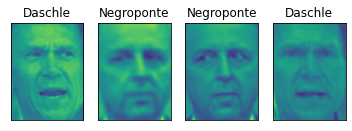

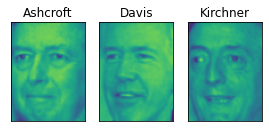

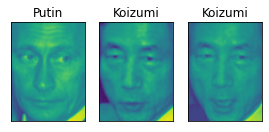

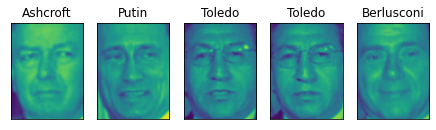

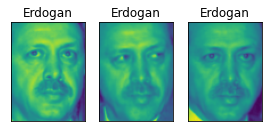

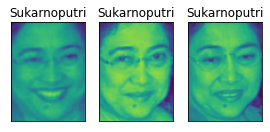

In [62]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels)+1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [64]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('Cluster sizes k-means: {}'.format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


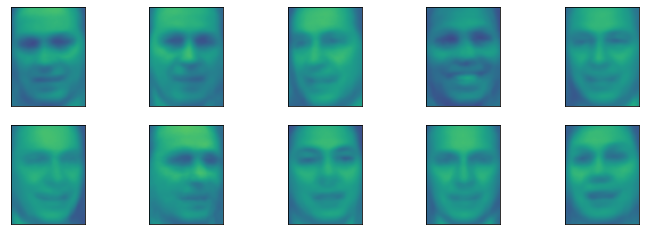

In [65]:
fig, axes = plt.subplots(2,5, figsize=(12,4), subplot_kw={'xticks': (), 'yticks': ()})
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

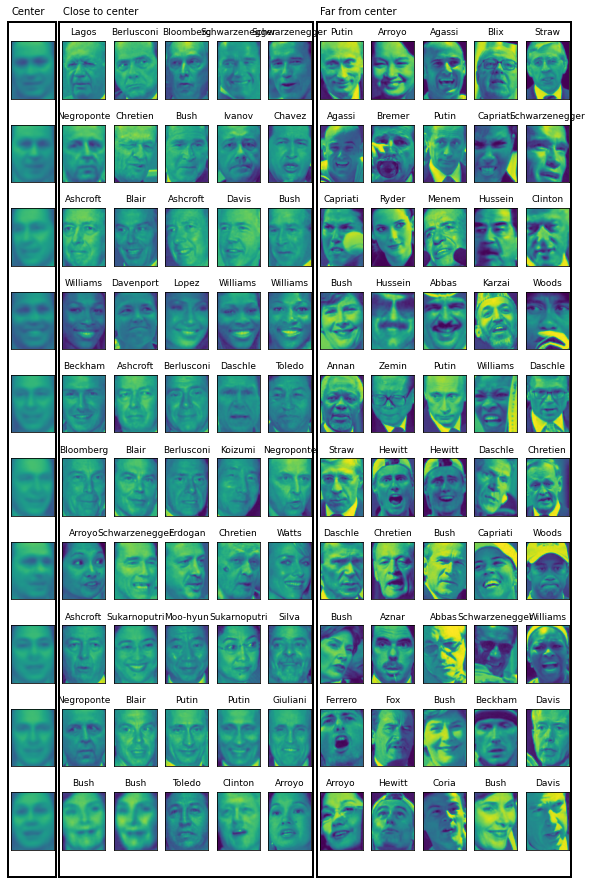

In [66]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [67]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Cluster sizes agglomerative clusting: {}'.format(np.bincount(labels_agg)))

Cluster sizes agglomerative clusting: [169 660 144 329 217  85  18 261  31 149]


In [69]:
print('ARI: {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


Text(0, 0.5, 'Cluster distance')

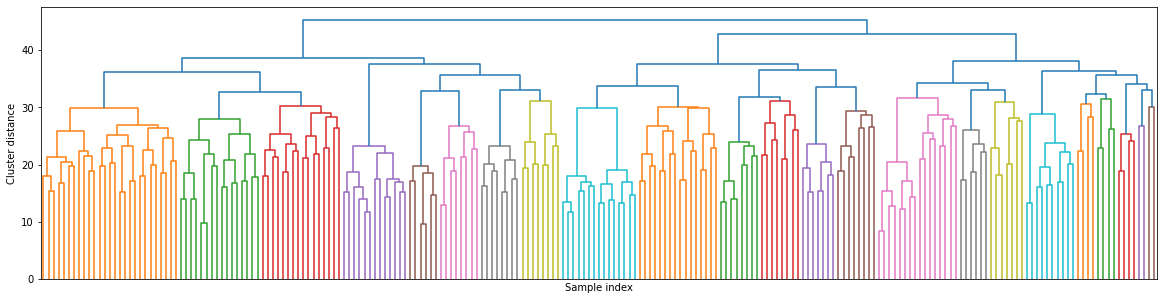

In [72]:
linkage_array = ward(X_pca)
plt.figure(figsize=(20,5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')

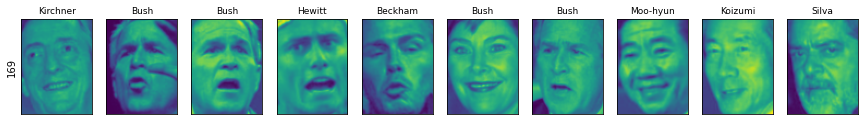

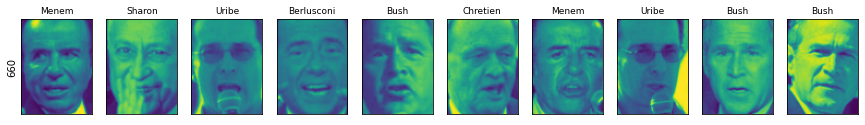

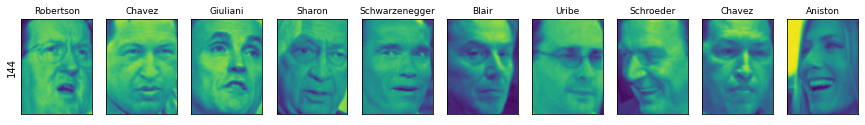

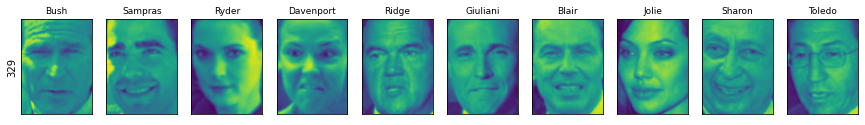

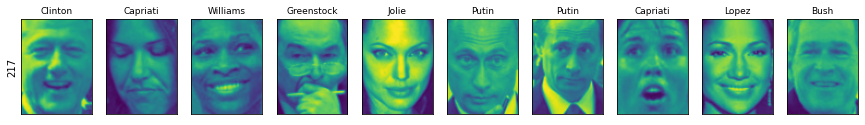

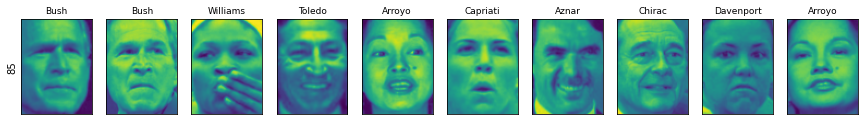

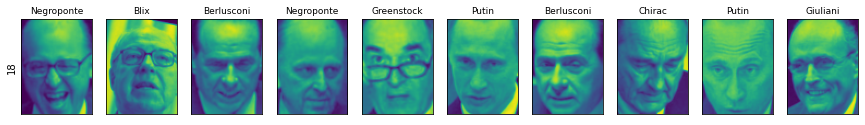

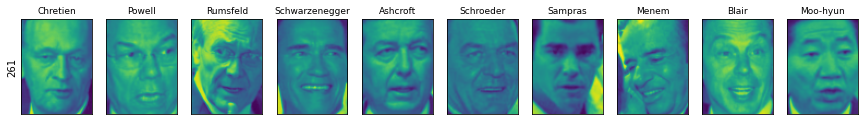

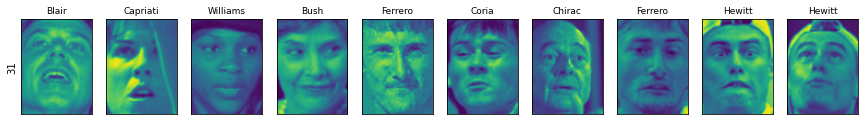

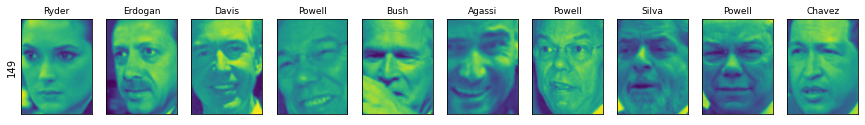

In [73]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})